In [58]:
import pandas as pd
import requests
import io
import zipfile

url = 'https://aqs.epa.gov/aqsweb/airdata/{}_aqi_by_{}_{}.zip'.format('daily', 'cbsa', '2019')
'https://aqs.epa.gov/aqsweb/airdata/annual_aqi_by_cbsa_2019.zip'
# URL of the zip file

# Download the zip file and extract the contents
response = requests.get(url)
zipped_file = zipfile.ZipFile(io.BytesIO(response.content))
csv_filename = zipped_file.namelist()[0]
csv_file = zipped_file.open(csv_filename)

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Close the file objects
csv_file.close()
zipped_file.close()

# Print the DataFrame
df.head()


,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,"Aberdeen, SD",10100,2019-01-03,4,Good,PM10,46-013-0003,1
1,"Aberdeen, SD",10100,2019-01-06,31,Good,PM2.5,46-013-0003,1
2,"Aberdeen, SD",10100,2019-01-09,9,Good,PM10,46-013-0003,1
3,"Aberdeen, SD",10100,2019-01-12,43,Good,PM2.5,46-013-0003,1
4,"Aberdeen, SD",10100,2019-01-15,28,Good,PM2.5,46-013-0003,1


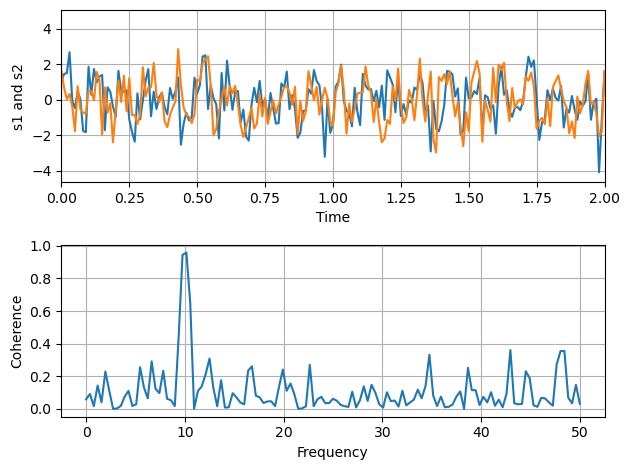

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10 Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('Coherence')

fig.tight_layout()
plt.show()

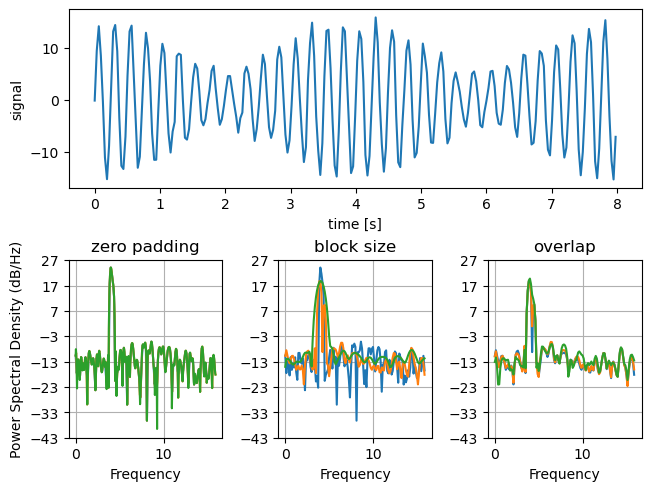

In [13]:
dt = np.pi / 100.
fs = 1. / dt
t = np.arange(0, 8, dt)
y = 10. * np.sin(2 * np.pi * 4 * t) + 5. * np.sin(2 * np.pi * 4.25 * t)
y = y + np.random.randn(*t.shape)

# Plot the raw time series
fig, axs = plt.subplot_mosaic([
    ['signal', 'signal', 'signal'],
    ['zero padding', 'block size', 'overlap'],
], layout='constrained')
# ], layout='constrained')

axs['signal'].plot(t, y)
axs['signal'].set_xlabel('time [s]')
axs['signal'].set_ylabel('signal')

# Plot the PSD with different amounts of zero padding. This uses the entire
# time series at once
axs['zero padding'].psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
axs['zero padding'].psd(y, NFFT=len(t), pad_to=len(t) * 2, Fs=fs)
axs['zero padding'].psd(y, NFFT=len(t), pad_to=len(t) * 4, Fs=fs)

# Plot the PSD with different block sizes, Zero pad to the length of the
# original data sequence.
axs['block size'].psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
axs['block size'].psd(y, NFFT=len(t) // 2, pad_to=len(t), Fs=fs)
axs['block size'].psd(y, NFFT=len(t) // 4, pad_to=len(t), Fs=fs)
axs['block size'].set_ylabel('')

# Plot the PSD with different amounts of overlap between blocks
axs['overlap'].psd(y, NFFT=len(t) // 2, pad_to=len(t), noverlap=0, Fs=fs)
axs['overlap'].psd(y, NFFT=len(t) // 2, pad_to=len(t),
                   noverlap=int(0.025 * len(t)), Fs=fs)
axs['overlap'].psd(y, NFFT=len(t) // 2, pad_to=len(t),
                   noverlap=int(0.1 * len(t)), Fs=fs)
axs['overlap'].set_ylabel('')
axs['overlap'].set_title('overlap')

for title, ax in axs.items():
    if title == 'signal':
        continue

    ax.set_title(title)
    ax.sharex(axs['zero padding'])
    ax.sharey(axs['zero padding'])

plt.show()

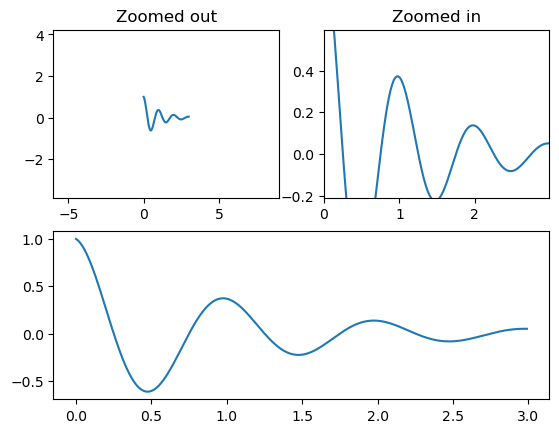

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

url = 'https://myaasc.com/pollen-explorer' # Replace with the URL of the website containing the chart

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the chart data in the HTML using BeautifulSoup
chart_data = []
for data in soup.find_all('div', {'class': 'chart-data'}):
    chart_data.append(float(data.text))

# Create a bar chart using matplotlib
plt.bar(range(len(chart_data)), chart_data)
plt.xlabel('X Label') # Replace with appropriate X-axis label
plt.ylabel('Y Label') # Replace with appropriate Y-axis label
plt.title('Chart Title') # Replace with appropriate chart title
plt.show()
